In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)


In [10]:
# View all of the classes that automap found
inspect = inspect(engine)
print(inspect.get_table_names())

['measurement', 'station']


In [11]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
col_name = inspect.get_columns('measurement')
for col in col_name:
    print(col['name'], col['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [31]:
recent_date = engine.execute('select max(date) from measurement').fetchall()
print(f"The most recent date is {recent_date[0][0]}")

The most recent date is 2017-08-23


One year from most recent date was 2016-08-23 00:00:00


<AxesSubplot:xlabel='Dates'>

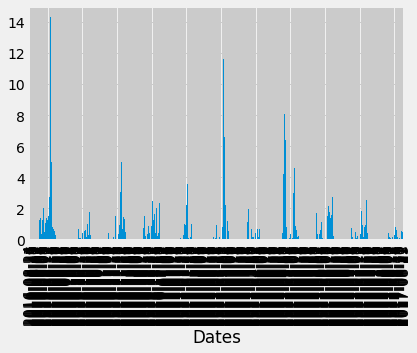

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
import datetime as dt
start_date = dt.datetime(2016,8,23)
print(f"One year from most recent date was {start_date}")

# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores
one_year = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= start_date).all()




# Save the query results as a Pandas DataFrame and set the index to the date column
raindex = [{'Dates':rain[0], "Precipitation":rain[1]} for rain in one_year]


raindex_df = pd.DataFrame(raindex)
raindex_df = raindex_df.dropna()
raindex_df
# Sort the dataframe by date
raindex_df.groupby('Dates')['Precipitation'].sum().plot.bar()

# Use Pandas Plotting with Matplotlib to plot the data




In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()